**Pandas: Stack/Unstack, Pivot_table&Cross Tab**

- **out of clutter ,find simplicity**

In [31]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pylab as plt

In [32]:
adult  = pd.read_csv("adult.data",
                     names = ['age', 'workclass','fnlwgt', 'education', 'education_num','marital_status', 
                         'occupation','relationship', 'race', 'sex', 'capital_gain','capital_loss',
                         'hours_per_week', 'native_country','label'], 
                     index_col = False)

print("Shape of data{}".format(adult.shape))
adult.head()

Shape of data(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


some of the predictor features age, workclass, education, marital_status,
race,sex,native_country, hours_per_week and response feature is label. Also,
we are replacing label values <= 50K, >50K by 0 and 1 respectively

In [33]:
print("Unique values of label before replacement {}".format(adult['label'].unique()))

Unique values of label before replacement [' <=50K' ' >50K']


In [34]:
adult['label'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [35]:
adult['label_50'] = np.where(adult['label'] == ' <=50K', 0, 1) #replacement of label values
print("label values count after replacement\n{}".format(adult['label_50'].value_counts()))

label values count after replacement
0    24720
1     7841
Name: label_50, dtype: int64


The bi-variate analysis explains and validates the relationship between features.
And categorical features need groupby and apply functions to understand their relationship
with numeric and other categorical features.
in this context Pandas Pivot_table, stack/Unstack & Crosstab methods are very powerful.

**Pivot_table**(pivot探讨;透视表)

coming back to our dataset, usually, earnings are frequently associated with the
occupation, So, Let's pivot the occupation and see which occupations have high earning people

                       sum        
sex                 Female    Male
occupation                        
 ?                    52.0   139.0
 Adm-clerical        212.0   295.0
 Armed-Forces          NaN     1.0
 Craft-repair         20.0   909.0
 Exec-managerial     280.0  1688.0
 Farming-fishing       2.0   113.0
 Handlers-cleaners     4.0    82.0
 Machine-op-inspct    20.0   230.0
 Other-service        51.0    86.0
 Priv-house-serv       1.0     0.0
 Prof-specialty      385.0  1474.0
 Protective-serv      10.0   201.0
 Sales                88.0   895.0
 Tech-support         45.0   238.0
 Transport-moving      9.0   311.0


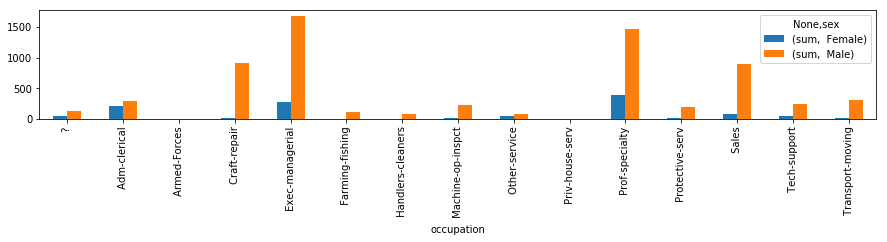

In [36]:
pt = adult.pivot_table(index = 'occupation', columns= 'sex', values= 'label_50', aggfunc= ['sum'])
print(pt)
pt.plot(kind= 'bar', figsize= (15,2))

- Exec Managerial, Prof-speciality and sales have the highest number of males and female people who earn
more than 50K, it may come out as one important feature.

**Multiple columns can also be used during pivoting, we can use pivot_table like following for multiple columns**

In [37]:
pt = adult.pivot_table(index= 'occupation', columns= ['marital_status', 'sex'], values= 'label_50',
                      aggfunc= 'sum')
pt.head()

marital_status    Divorced        Married-AF-spouse        Married-civ-spouse  \
sex                 Female  Male             Female  Male              Female   
occupation                                                                      
 ?                     4.0   2.0                0.0   NaN                42.0   
 Adm-clerical         15.0  11.0                1.0   0.0               171.0   
 Armed-Forces          NaN   NaN                NaN   NaN                 NaN   
 Craft-repair          7.0  38.0                1.0   1.0                10.0   
 Exec-managerial      66.0  77.0                1.0   NaN               155.0   

marital_status            Married-spouse-absent        Never-married        \
sex                 Male                 Female  Male         Female  Male   
occupation                                                                   
 ?                 129.0                    0.0   1.0            2.0   7.0   
 Adm-clerical      264.0                    1.0   1.0           17.0  16.0   
 Armed-Forces        1.0                    NaN   NaN            NaN   0.0   
 Craft-repair      823.0                    0.0   4.0            2.0  33.0   
 Exec-managerial  1511.0                    3.0   5.0           42.0  70.0   

marital_status    Separated        Widowed        
sex                  Female  Male   Female  Male  
occupation                                        
 ?                      0.0   0.0      4.0   0.0  
 Adm-clerical           1.0   2.0      6.0   1.0  
 Armed-Forces           NaN   NaN      NaN   NaN  
 Craft-repair           0.0   6.0      0.0   4.0  
 Exec-managerial        3.0  16.0     10.0   9.0

- single level columns after combing the previous two levels

In [40]:
pt_copy = pt.copy()
pt_copy.columns = pt_copy.columns.map('*'.join)
pt_copy.head()

,Divorced* Female,Divorced* Male,Married-AF-spouse* Female,Married-AF-spouse* Male,Married-civ-spouse* Female,Married-civ-spouse* Male,Married-spouse-absent* Female,Married-spouse-absent* Male,Never-married* Female,Never-married* Male,Separated* Female,Separated* Male,Widowed* Female,Widowed* Male
occupation,,,,,,,,,,,,,,
?,4.0,2.0,0.0,NaN,42.0,129.0,0.0,1.0,2.0,7.0,0.0,0.0,4.0,0.0
Adm-clerical,15.0,11.0,1.0,0.0,171.0,264.0,1.0,1.0,17.0,16.0,1.0,2.0,6.0,1.0
Armed-Forces,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
Craft-repair,7.0,38.0,1.0,1.0,10.0,823.0,0.0,4.0,2.0,33.0,0.0,6.0,0.0,4.0
Exec-managerial,66.0,77.0,1.0,NaN,155.0,1511.0,3.0,5.0,42.0,70.0,3.0,16.0,10.0,9.0


**CrossTab**

In [44]:
print("simple frequncy table of education and sex \n\n{}".format(pd.crosstab(index = adult.education, 
                                                                             columns = adult.sex).head(20)))

simple frequncy table of education and sex 

sex             Female   Male
education                    
 10th              295    638
 11th              432    743
 12th              144    289
 1st-4th            46    122
 5th-6th            84    249
 7th-8th           160    486
 9th               144    370
 Assoc-acdm        421    646
 Assoc-voc         500    882
 Bachelors        1619   3736
 Doctorate          86    327
 HS-grad          3390   7111
 Masters           536   1187
 Preschool          16     35
 Prof-school        92    484
 Some-college     2806   4485


In [43]:
pd.crosstab(index = adult.education, columns = adult.sex).head()

sex,Female,Male
education,,
10th,295,638
11th,432,743
12th,144,289
1st-4th,46,122
5th-6th,84,249


frequency table of education and sex

Crosstab can be used just like pivo_table by passing values and aggregation
paramenters. Following is a Bar plotof people earn more than 50K across
education and sex(male/female) features with the help of crosstab

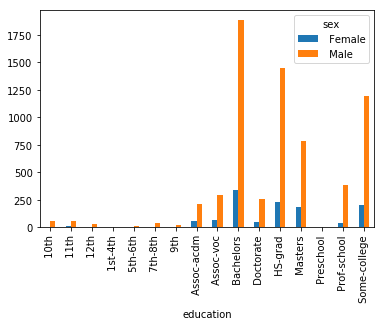

In [46]:
pd.crosstab(index = adult.education, columns= adult.sex, values= adult.label_50,
           aggfunc= 'sum').plot(kind = 'bar')

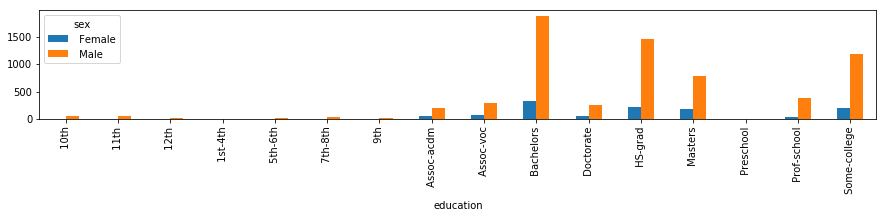

In [47]:
pd.crosstab(index = adult.education, columns= adult.sex, values= adult.label_50,
           aggfunc= 'sum').plot(kind = 'bar', figsize = (15, 2))

pd.cross tab also has a parameter Normalized. While we do bivariate
analysis, frequency tables can also be normalized to show percentages rather
than counts:

In [49]:
pd.crosstab(adult.education, adult.label_50, normalize= True)

label_50,0,1
education,,
10th,0.026750,0.001904
11th,0.034243,0.001843
12th,0.012285,0.001013
1st-4th,0.004975,0.000184
5th-6th,0.009736,0.000491
7th-8th,0.018611,0.001228
9th,0.014957,0.000829
Assoc-acdm,0.024631,0.008139
Assoc-voc,0.031357,0.011087


**Stack/Unstack**

- Stacking a DataFrame means moving the innermost column index to become
the innermost row index. The inverse operation is called unstacking.
- **What is Stacking?** if we have multiple-index columns and we reduce
dataset columns by moving innermost column level to innermost row level
So the stack is cols to rows(innermost).
- **what is Unstacking?** if we have multiple-index rows and we reduce dataset rows by moving innermost row level to innermost column level.So
unstack is rows to cols(innermost)
In our download data, we don't have any multiple indexes, but our pivoted
dataset has multiple indexes. Viewing the pivot_table dataset

In [50]:
pt.head()

marital_status    Divorced        Married-AF-spouse        Married-civ-spouse  \
sex                 Female  Male             Female  Male              Female   
occupation                                                                      
 ?                     4.0   2.0                0.0   NaN                42.0   
 Adm-clerical         15.0  11.0                1.0   0.0               171.0   
 Armed-Forces          NaN   NaN                NaN   NaN                 NaN   
 Craft-repair          7.0  38.0                1.0   1.0                10.0   
 Exec-managerial      66.0  77.0                1.0   NaN               155.0   

marital_status            Married-spouse-absent        Never-married        \
sex                 Male                 Female  Male         Female  Male   
occupation                                                                   
 ?                 129.0                    0.0   1.0            2.0   7.0   
 Adm-clerical      264.0                    1.0   1.0           17.0  16.0   
 Armed-Forces        1.0                    NaN   NaN            NaN   0.0   
 Craft-repair      823.0                    0.0   4.0            2.0  33.0   
 Exec-managerial  1511.0                    3.0   5.0           42.0  70.0   

marital_status    Separated        Widowed        
sex                  Female  Male   Female  Male  
occupation                                        
 ?                      0.0   0.0      4.0   0.0  
 Adm-clerical           1.0   2.0      6.0   1.0  
 Armed-Forces           NaN   NaN      NaN   NaN  
 Craft-repair           0.0   6.0      0.0   4.0  
 Exec-managerial        3.0  16.0     10.0   9.0

initial Pivot table

***stack* moves the inner level column to inner level rows and unstacking can again be brought it back to the original pivot shape.**

In [53]:
pt.stack().head(10)

marital_status             Divorced   Married-AF-spouse   Married-civ-spouse  \
occupation       sex                                                           
 ?                Female        4.0                 0.0                 42.0   
                  Male          2.0                 NaN                129.0   
 Adm-clerical     Female       15.0                 1.0                171.0   
                  Male         11.0                 0.0                264.0   
 Armed-Forces     Male          NaN                 NaN                  1.0   
 Craft-repair     Female        7.0                 1.0                 10.0   
                  Male         38.0                 1.0                823.0   
 Exec-managerial  Female       66.0                 1.0                155.0   
                  Male         77.0                 NaN               1511.0   
 Farming-fishing  Female        1.0                 NaN                  0.0   

marital_status             Married-spouse-absent   Never-married   Separated  \
occupation       sex                                                           
 ?                Female                     0.0             2.0         0.0   
                  Male                       1.0             7.0         0.0   
 Adm-clerical     Female                     1.0            17.0         1.0   
                  Male                       1.0            16.0         2.0   
 Armed-Forces     Male                       NaN             0.0         NaN   
 Craft-repair     Female                     0.0             2.0         0.0   
                  Male                       4.0            33.0         6.0   
 Exec-managerial  Female                     3.0            42.0         3.0   
                  Male                       5.0            70.0        16.0   
 Farming-fishing  Female                     1.0             0.0         0.0   

marital_status             Widowed  
occupation       sex                
 ?                Female       4.0  
                  Male         0.0  
 Adm-clerical     Female       6.0  
                  Male         1.0  
 Armed-Forces     Male         NaN  
 Craft-repair     Female       0.0  
                  Male         4.0  
 Exec-managerial  Female      10.0  
                  Male         9.0  
 Farming-fishing  Female       0.0

Pivot table after stacking

In [54]:
pt.stack().unstack().head()

marital_status    Divorced        Married-AF-spouse        Married-civ-spouse  \
sex                 Female  Male             Female  Male              Female   
occupation                                                                      
 ?                     4.0   2.0                0.0   NaN                42.0   
 Adm-clerical         15.0  11.0                1.0   0.0               171.0   
 Armed-Forces          NaN   NaN                NaN   NaN                 NaN   
 Craft-repair          7.0  38.0                1.0   1.0                10.0   
 Exec-managerial      66.0  77.0                1.0   NaN               155.0   

marital_status            Married-spouse-absent        Never-married        \
sex                 Male                 Female  Male         Female  Male   
occupation                                                                   
 ?                 129.0                    0.0   1.0            2.0   7.0   
 Adm-clerical      264.0                    1.0   1.0           17.0  16.0   
 Armed-Forces        1.0                    NaN   NaN            NaN   0.0   
 Craft-repair      823.0                    0.0   4.0            2.0  33.0   
 Exec-managerial  1511.0                    3.0   5.0           42.0  70.0   

marital_status    Separated        Widowed        
sex                  Female  Male   Female  Male  
occupation                                        
 ?                      0.0   0.0      4.0   0.0  
 Adm-clerical           1.0   2.0      6.0   1.0  
 Armed-Forces           NaN   NaN      NaN   NaN  
 Craft-repair           0.0   6.0      0.0   4.0  
 Exec-managerial        3.0  16.0     10.0   9.0

Stack and understack brought original pivot table

In [55]:
pt.stack(level = 1).head(10)

marital_status             Divorced   Married-AF-spouse   Married-civ-spouse  \
occupation       sex                                                           
 ?                Female        4.0                 0.0                 42.0   
                  Male          2.0                 NaN                129.0   
 Adm-clerical     Female       15.0                 1.0                171.0   
                  Male         11.0                 0.0                264.0   
 Armed-Forces     Male          NaN                 NaN                  1.0   
 Craft-repair     Female        7.0                 1.0                 10.0   
                  Male         38.0                 1.0                823.0   
 Exec-managerial  Female       66.0                 1.0                155.0   
                  Male         77.0                 NaN               1511.0   
 Farming-fishing  Female        1.0                 NaN                  0.0   

marital_status             Married-spouse-absent   Never-married   Separated  \
occupation       sex                                                           
 ?                Female                     0.0             2.0         0.0   
                  Male                       1.0             7.0         0.0   
 Adm-clerical     Female                     1.0            17.0         1.0   
                  Male                       1.0            16.0         2.0   
 Armed-Forces     Male                       NaN             0.0         NaN   
 Craft-repair     Female                     0.0             2.0         0.0   
                  Male                       4.0            33.0         6.0   
 Exec-managerial  Female                     3.0            42.0         3.0   
                  Male                       5.0            70.0        16.0   
 Farming-fishing  Female                     1.0             0.0         0.0   

marital_status             Widowed  
occupation       sex                
 ?                Female       4.0  
                  Male         0.0  
 Adm-clerical     Female       6.0  
                  Male         1.0  
 Armed-Forces     Male         NaN  
 Craft-repair     Female       0.0  
                  Male         4.0  
 Exec-managerial  Female      10.0  
                  Male         9.0  
 Farming-fishing  Female       0.0

These methods really help us bring those insights and model explanations
to come out. Hierarchical/Multi-level indexing is very exciting as it opens
the door to some quite sophisticated data analysis and manipulation,
especially for working with higher dimensional data. 